<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Capstone%20Project%20-%20Fitbit%20Consumer%20Behaviour%20Analysis/Fitbit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
d_1 = pd.read_csv('/content/minuteSleep_merged.csv')
d_2 = pd.read_csv('/content/sleepDay_merged.csv')
d_3 = pd.read_csv('/content/heartrate_seconds_merged.csv')
d_4 = pd.read_csv('/content/weightLogInfo_merged.csv')

In [ ]:
list_of_all_dataframes = [d_1, d_2, d_3, d_4]

for df in list_of_all_dataframes:
    print(f"Shape of {df.index.name}: {df.shape}")

Shape of None: (188521, 4)
Shape of None: (413, 5)
Shape of None: (2483658, 3)
Shape of None: (67, 8)


In [ ]:
for df in list_of_all_dataframes:
    print(f"Shape of {df.index.name}: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB
Shape of None: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
Shape of None: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data co

**Data Cleaning**

---



In [ ]:
data_sleep = d_1.merge(d_2)

In [ ]:
data_sleep.head()

,Id,date,value,logId,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/12/2016 2:47:30 AM,3,11380564589,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/12/2016 2:47:30 AM,3,11380564589,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/12/2016 2:47:30 AM,3,11380564589,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/12/2016 2:47:30 AM,3,11380564589,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702224 entries, 0 to 4702223
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   date                object
 2   value               int64 
 3   logId               int64 
 4   SleepDay            object
 5   TotalSleepRecords   int64 
 6   TotalMinutesAsleep  int64 
 7   TotalTimeInBed      int64 
dtypes: int64(6), object(2)
memory usage: 322.9+ MB


In [ ]:
data_sleep['date'] = pd.to_datetime(data_sleep['date'])

In [ ]:
data_sleep['date'].dtype

dtype('<M8[ns]')

In [ ]:
data_sleep['SleepDay'] = pd.to_datetime(data_sleep['SleepDay'])

In [ ]:
data_sleep['SleepDay'].dtype

dtype('<M8[ns]')

In [ ]:
data_sleep.columns = data_sleep.columns.str.lower()

In [ ]:
data_sleep.columns

Index(['id', 'date', 'value', 'logid', 'sleepday', 'totalsleeprecords',
       'totalminutesasleep', 'totaltimeinbed'],
      dtype='object')

In [ ]:
data_sleep = data_sleep.rename(columns={'logid':'log_id','sleepday':'sleep_day','total_sleep_records':'total_sleep_records',
                                       'totalminutesasleep':'total_minutes_asleep', 'totaltimeinbed':'total_time_in_bed'})

In [ ]:
d_3.head(3)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105


In [ ]:
d_3['Time'] = pd.to_datetime(d_3['Time'])

In [ ]:
d_3.columns = d_3.columns.str.lower()

In [ ]:
d_3['day'] = d_3['time'].dt.date

In [ ]:
d_3.head()

,id,time,value,day
0,2022484408,2016-04-12 07:21:00,97,2016-04-12
1,2022484408,2016-04-12 07:21:05,102,2016-04-12
2,2022484408,2016-04-12 07:21:10,105,2016-04-12
3,2022484408,2016-04-12 07:21:20,103,2016-04-12
4,2022484408,2016-04-12 07:21:25,101,2016-04-12


In [ ]:
d_4.head(3)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000


In [ ]:
d_4['Date'] = pd.to_datetime(d_4['Date'])

In [ ]:
d_4.columns = d_4.columns.str.lower()

In [ ]:
d_4.columns

Index(['id', 'date', 'weightkg', 'weightpounds', 'fat', 'bmi',
       'ismanualreport', 'logid'],
      dtype='object')

In [ ]:
d_4 = d_4.rename(columns={'weightkg':'weight_kg','weightpounds':'weight_pounds','ismanualreport':'is_manual_report','logid':'log_id'})

**Univariate Analysis**

---



Non-Visual Analysis

In [ ]:
data_sleep['id'].nunique()

24

In [ ]:
d_3['id'].nunique()

14

In [ ]:
d_4['id'].nunique()

8

In [ ]:
def numerical_data(numerical_feature):
  for col in numerical_feature:
    print('*'*5, col, '*'*5)
    print(numerical_feature[col].agg(['count', 'nunique','mean','max','min','std','skew','kurtosis']))
    print()

In [ ]:
df_sleep = data_sleep[['total_minutes_asleep','total_time_in_bed']]
df_heart = d_3[['value']]
df_weight = d_4[['weight_kg','weight_pounds','fat','bmi']]

In [ ]:
numerical_data(df_sleep)

***** total_minutes_asleep *****
count       4.702224e+06
nunique     2.560000e+02
mean        4.307035e+02
max         7.960000e+02
min         5.800000e+01
std         1.024549e+02
skew       -4.962369e-01
kurtosis    1.856172e+00
Name: total_minutes_asleep, dtype: float64

***** total_time_in_bed *****
count       4.702224e+06
nunique     2.420000e+02
mean        4.705422e+02
max         9.610000e+02
min         6.100000e+01
std         1.027080e+02
skew       -3.333519e-01
kurtosis    3.777752e+00
Name: total_time_in_bed, dtype: float64



In [ ]:
numerical_data(df_heart)

***** value *****
count       2.483658e+06
nunique     1.680000e+02
mean        7.732842e+01
max         2.030000e+02
min         3.600000e+01
std         1.940450e+01
skew        1.348833e+00
kurtosis    2.804581e+00
Name: value, dtype: float64



In [ ]:
numerical_data(df_weight)

***** weight_kg *****
count        67.000000
nunique      34.000000
mean         72.035821
max         133.500000
min          52.599998
std          13.923206
skew          1.369669
kurtosis      3.861951
Name: weight_kg, dtype: float64

***** weight_pounds *****
count        67.000000
nunique      34.000000
mean        158.811801
max         294.317120
min         115.963147
std          30.695415
skew          1.369669
kurtosis      3.861951
Name: weight_pounds, dtype: float64

***** fat *****
count        2.00000
nunique      2.00000
mean        23.50000
max         25.00000
min         22.00000
std          2.12132
skew             NaN
kurtosis         NaN
Name: fat, dtype: float64

***** bmi *****
count       67.000000
nunique     36.000000
mean        25.185224
max         47.540001
min         21.450001
std          3.066963
skew         6.000242
kurtosis    43.824926
Name: bmi, dtype: float64



Vizual Analysis

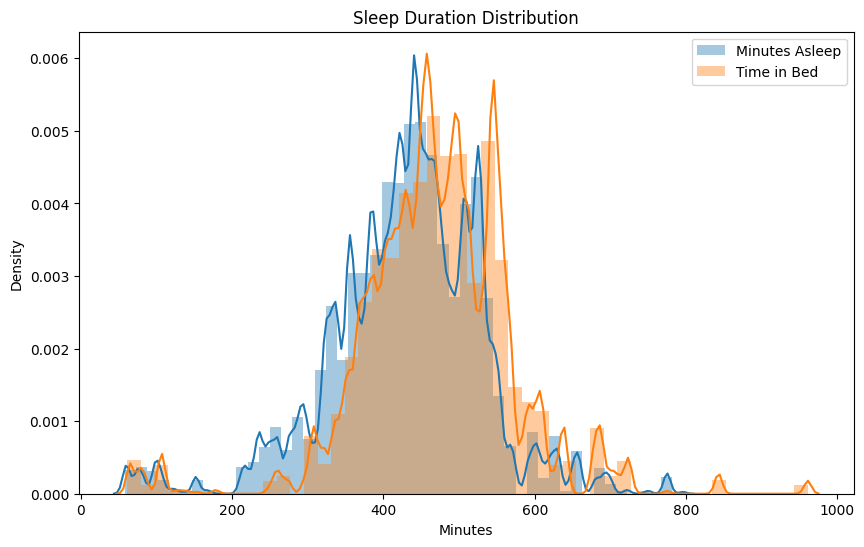

In [ ]:
plt.figure(figsize=(10, 6))  # Create a new figure
sns.distplot(df_sleep['total_minutes_asleep'], label='Minutes Asleep')
sns.distplot(df_sleep['total_time_in_bed'], label='Time in Bed')
plt.legend()  # Show legend
plt.xlabel('Minutes')  # Set x-axis label
plt.ylabel('Density')  # Set y-axis label
plt.title('Sleep Duration Distribution')  # Set plot title
plt.show()  # Display the plot

<Axes: ylabel='Density'>

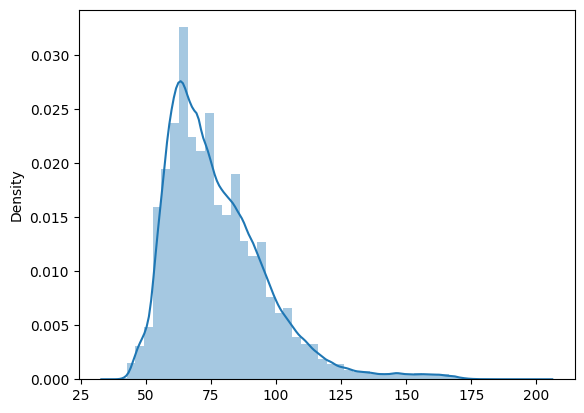

In [ ]:
sns.distplot(df_heart, label='Heart Rate')

<Axes: xlabel='weight_kg', ylabel='Density'>

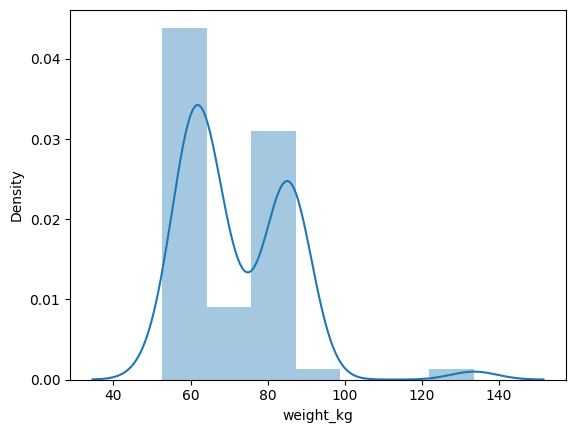

In [ ]:
sns.distplot(df_weight['weight_kg'], label='Weight Kgs')

<Axes: xlabel='bmi', ylabel='Density'>

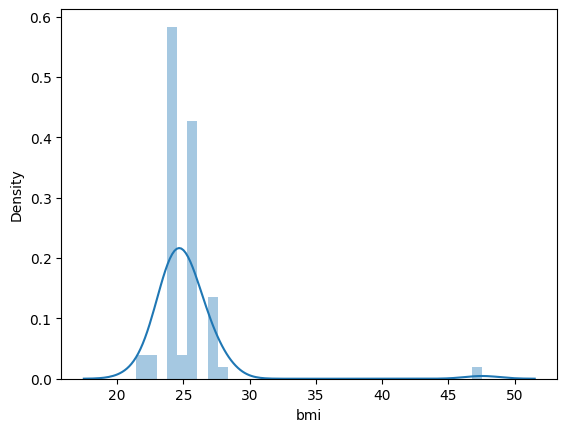

In [ ]:
sns.distplot(df_weight['bmi'], label='BMI')

total_minutes_asleep       Axes(0.125,0.798085;0.227941x0.0819149)
total_time_in_bed       Axes(0.398529,0.798085;0.227941x0.0819149)
dtype: object

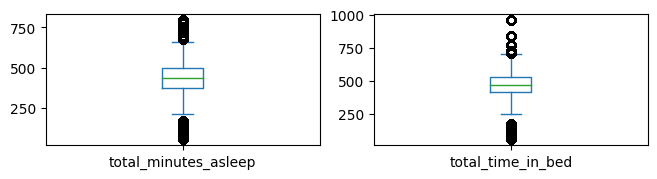

In [ ]:
df_sleep.plot(kind='box',subplots=True,layout=(8,3),figsize=(12,16))

value    Axes(0.125,0.798085;0.227941x0.0819149)
dtype: object

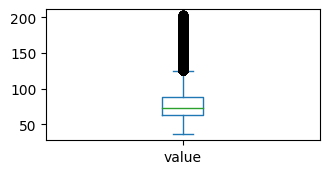

In [ ]:
df_heart.plot(kind='box',subplots=True,layout=(8,3),figsize=(12,16))

weight_kg           Axes(0.125,0.798085;0.227941x0.0819149)
weight_pounds    Axes(0.398529,0.798085;0.227941x0.0819149)
fat              Axes(0.672059,0.798085;0.227941x0.0819149)
bmi                 Axes(0.125,0.699787;0.227941x0.0819149)
dtype: object

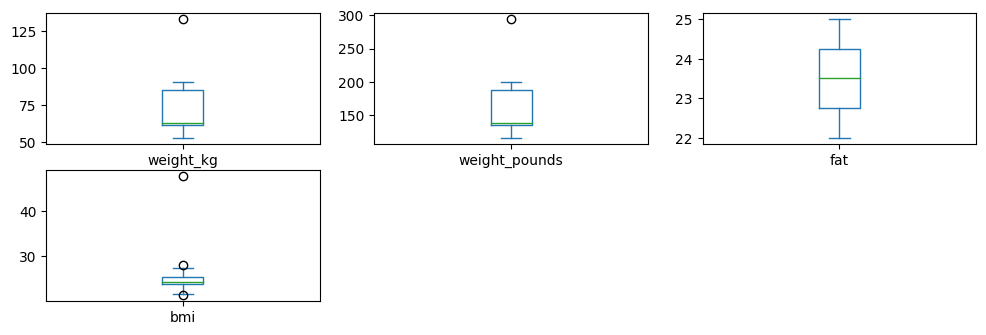

In [ ]:
df_weight.plot(kind='box',subplots=True,layout=(8,3),figsize=(12,16))

Univariate Analysis Observation:

- All the features in data are not normally distributed.
- All the features in data have outliers.

**Bivariate Analysis**

---



In [ ]:
data_sleep_id = data_sleep.groupby(['id'])['total_minutes_asleep'].mean()
data_sleep_bed = data_sleep.groupby(['id'])['total_time_in_bed'].mean()

In [ ]:
data_sleep_id.head()

id
1503960366    360.280000
1644430081    294.000000
1844505072    652.000000
1927972279    417.000000
2026352035    506.178571
Name: total_minutes_asleep, dtype: float64

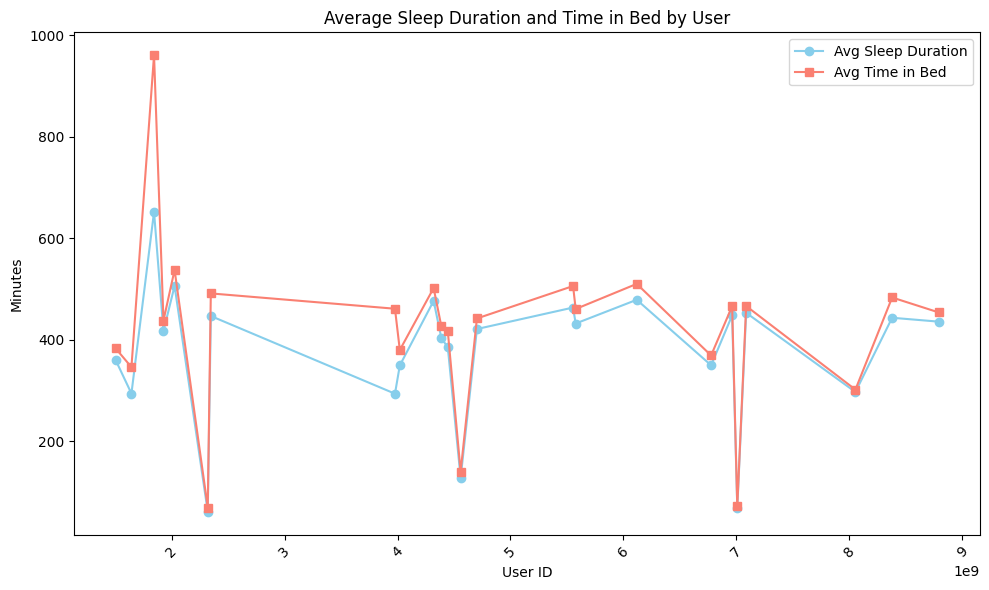

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_sleep_id.index,data_sleep_id.values, marker='o', label='Avg Sleep Duration', color='skyblue')
plt.plot(data_sleep_bed.index, data_sleep_bed.values, marker='s', label='Avg Time in Bed', color='salmon')
plt.xlabel('User ID')
plt.ylabel('Minutes')
plt.title('Average Sleep Duration and Time in Bed by User')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- People tend to lay down in bed for more time than actual time of sleep.

In [ ]:
data_weight_id = d_4.groupby(['id'])['weight_kg'].mean()
data_bmi_id = d_4.groupby(['id'])['bmi'].mean()

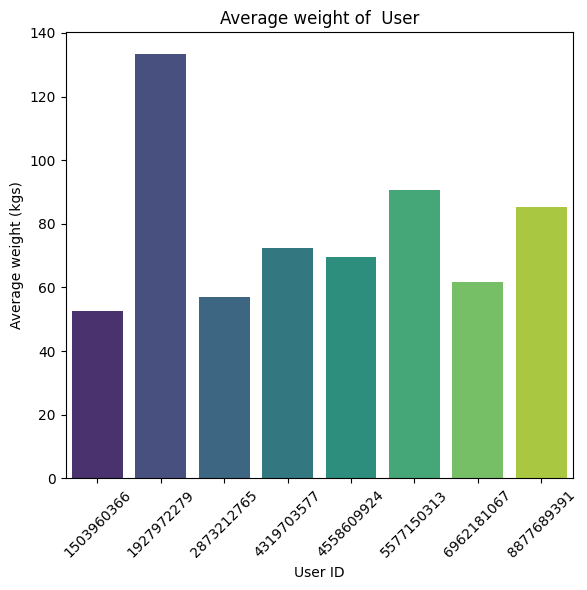

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=data_weight_id.index, y=data_weight_id.values, palette='viridis')
plt.xlabel('User ID')
plt.ylabel('Average weight (kgs)')
plt.title('Average weight of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Weight of all the ids are **below 100 kg** except one (around 130 kg)

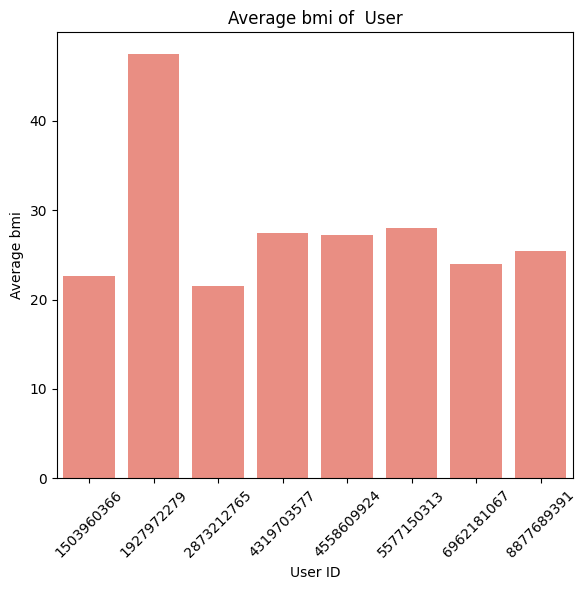

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=data_bmi_id.index, y=data_bmi_id.values,color='salmon')
plt.xlabel('User ID')
plt.ylabel('Average bmi')
plt.title('Average bmi of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- BMI of all the ids are below 30, except one (above 40).

In [ ]:
data_heart_id = d_3.groupby(['id'])['value'].mean()

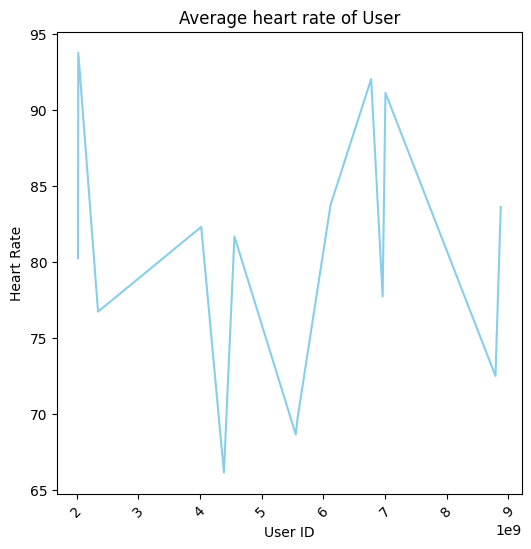

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(data_heart_id.index,data_heart_id.values, color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Heart Rate')
plt.title('Average heart rate of User')
plt.xticks(rotation=45)
plt.show()

- Heartrate ranging from 60-90 is being observed in users.


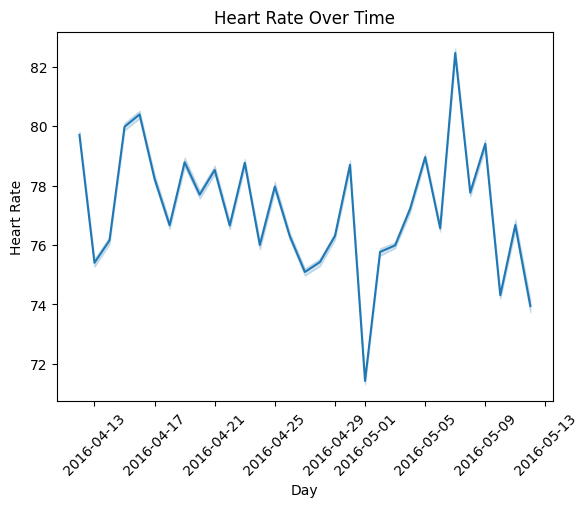

In [ ]:
sns.lineplot(x='day', y='value', data=d_3)
plt.xlabel('Day')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time')
plt.xticks(rotation=45)
plt.show()

- Overall the heartrate of all the users from month April-May is observed to be in normal range (60-100).

Overall Observations:
- People tend to lay down in bed for more time than actual time of sleep.
- Weight of all the ids are below 100 kg except one (around 130 kg).
- BMI of all the ids are below 30, except one (above 40).
- Heartrate ranging from 60-90 is being observed in users.
- Overall the heartrate of all the users from month April-May is observed to be in normal range (60-100).